In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x_range = 4.2
spatial_resolution = 50
temporal_resolution = 500
noise_resolution = 100

temporal_display_scale = 120
noise_display_scale = 20

a = 1.8
b = 1
A = 0.8

noise_scale = 0.075
# noise_scale = 0.05

In [3]:
def u(x, t):
  return -a * 0.5 * (x**2) + b * 0.25 * (x**4) + A * x * np.sin(t)

x = np.linspace(-x_range/2, x_range/2, spatial_resolution)
t = np.linspace(0, np.pi, temporal_resolution)
y = np.array([u(x, t_) for t_ in t])


In [4]:
def calculate_local_minimas():
  # Calculate the noise and the noise-y array
  noise = np.array([noise_scale * scale * np.random.normal(0, .1, y.shape) for scale in range(noise_resolution)])
  noise_y_array = np.array([np.array([y[idx] + noise_[idx] for idx in range(len(y))]) for noise_ in noise])

  # Calculate the local minimas
  local_minima_position = np.array([np.array([int(0.82*spatial_resolution) for _ in t]) for _ in noise])

  for noise_idx in range(len(noise)):
    for t_idx in range(len(t)):
      searching = True
      x_idx = local_minima_position[noise_idx][t_idx - 1]
      while searching:
        if x_idx - 1 < 0 or x_idx + 1 > len(noise_y_array[noise_idx][t_idx]):
          searching = False
        else:
          min_index = np.argmin(noise_y_array[noise_idx][t_idx][x_idx - 1:x_idx + 2])
          if min_index == 0:
            x_idx -= 1
          elif min_index == 1:
            searching = False
          else:
            x_idx += 1

      # for x_idx in range(len(x) - 1):
      local_minima_position[noise_idx][t_idx] = x_idx

  return noise_y_array, local_minima_position

In [67]:
well_depth = abs(np.min(y))
np.array([0.05 * scale * 0.1 for scale in range(noise_resolution)])

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
       0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
       0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
       0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
       0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
       0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
       0.495])

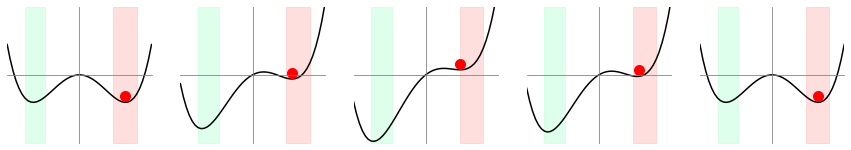

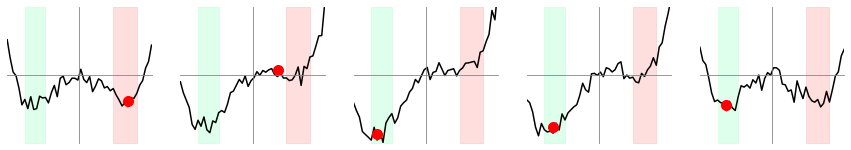

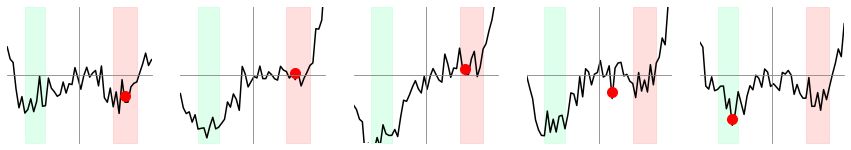

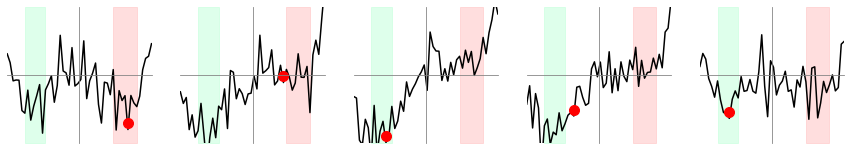

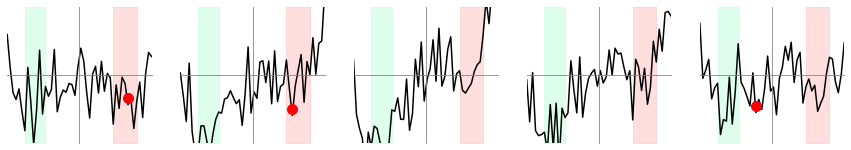

In [64]:
noise_y_array, local_minima_position = calculate_local_minimas()

# Function to plot on a set of axes
def plot(ax, x_data, y_data, minima):
  ax.plot(x_data, y_data, color='black')
  ax.plot(x_data[minima], y_data[minima] + 0.18, marker="o", markersize=10, markerfacecolor="red", markeredgecolor="red")
  ax.set_xlim(-x_range/2, x_range/2)
  ax.set_ylim(-2, 2)
  ax.spines['left'].set_position('zero')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_color('gray')
  ax.spines['bottom'].set_color('gray')
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.axes.xaxis.set_ticks([])
  ax.axes.yaxis.set_ticks([])

  minimum = x[int(0.1 * spatial_resolution)]
  maximum = x[int(0.28 * spatial_resolution)]

  ax.fill_between(x, 0, 1, where=np.bitwise_and(x < maximum, x > minimum), color='#bfffd8', alpha=0.5, transform=ax.get_xaxis_transform(), edgecolor="None")
  ax.fill_between(x, 0, 1, where=np.bitwise_and(x > -maximum, x < -minimum), color='#ffbfbf', alpha=0.5, transform=ax.get_xaxis_transform(), edgecolor="None")

# Create some sublots
horizontal_subplot_count = int(temporal_resolution/temporal_display_scale)
vertical_subplot_count = int(noise_resolution/noise_display_scale)

for j in range(vertical_subplot_count):

  fig, ax = plt.subplots(1, horizontal_subplot_count + 1, figsize=(15, 2.5))
  for i in range(horizontal_subplot_count):
    plot(ax[i], x, noise_y_array[j*noise_display_scale][i*temporal_display_scale], local_minima_position[j*noise_display_scale][i*temporal_display_scale])

  plot(ax[-1], x, noise_y_array[j*noise_display_scale][-1], local_minima_position[j*noise_display_scale][-1])

  plt.show()

In [6]:
from IPython.display import clear_output

iterations = 3000

average_in_band = None

for i in range(iterations):
  noise_y_array, local_minima_position = calculate_local_minimas()

  lower_bound = int(0.1  * spatial_resolution)
  upper_bound = int(0.28 * spatial_resolution)

  in_band = np.array([1 if minimas[-1] > lower_bound and minimas[-1] < upper_bound else 0 for minimas in local_minima_position])

  if average_in_band is None:
    average_in_band = in_band
  else:
    average_in_band += in_band

  clear_output(wait=True)
  print(f"{i} of {iterations} ({100*i/iterations}%)")

2999 of 3000 (99.96666666666667%)


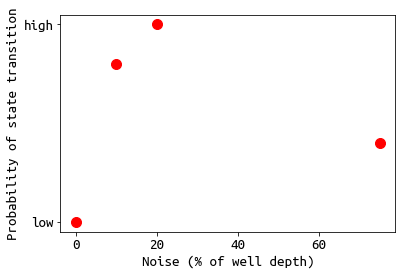

In [11]:
font = {'family' : 'consolas',
        'weight' : 'bold',
        'size'   : 22}

plt.rcParams.update({'font.family': "Ubuntu Mono"})
# plt.rcParams.update({'font.weight': "bold"})
plt.rcParams.update({'font.size': 15})

plt.plot([0,10,20,75], [0,0.4,0.5,0.2], 'ro', markersize=10)

# Set x and y labels
plt.xlabel('Noise (% of well depth)')
plt.ylabel('Probability of state transition')

# Replace y labels with 'high' and 'low'
plt.yticks([0, 0.5], ['low', 'high'])


plt.show()


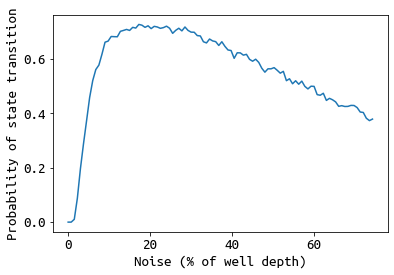

In [12]:
probabilities = average_in_band / iterations
noise_values = np.array([noise_scale * scale * 0.1 * 100 for scale in range(noise_resolution)])

# plt.plot(average_in_band)
# plt.show()

plt.rcParams.update({'font.family': "Ubuntu Mono"})
plt.rcParams.update({'font.size': 15})

plt.plot(noise_values, probabilities)

# Set x and y labels
plt.xlabel('Noise (% of well depth)')
plt.ylabel('Probability of state transition')


plt.show()
